In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import unicodedata

In [128]:
año_2025 = pd.read_excel("Reporte Omincanal 1 año.xlsx", sheet_name="Hoja1")

año_2025

,Folio,Canal,Tienda,Tipo de Entrega,Fulfillment,Referencia,Factura,Folio Fiscal,Fecha de creación,Estado,...,Comprador,Teléfono,Método de envío,Número de seguimiento,Calle Destino,Ciudad Destino,Estado Destino,CP Destino,Fecha de envío,Fecha de entrega
0,M2520273,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,No,2000008204619379,NaN,NaN,2025-06-16 00:20:00,ENTREGADO,...,Jose Luis Juarez,XXXXXXX,MEL Distribution,MEL45023345969LMXDF01,Calle Vía Rápida Oriente,Tijuana,Baja California,22226,2025-06-17 16:04:00,NaN
1,M2520274,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,No,2000008204625229,NaN,NaN,2025-06-16 00:24:00,ENTREGADO,...,Carlos Ivan Vazquez Soto,XXXXXXX,MEL Distribution,MEL45023349737LMXDF01,Entre calle Ignacio Zaragoza y sonora,Ahome,Sinaloa,81343,2025-06-17 16:04:00,NaN
2,M2520275,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,Sí,2000008205074963,NaN,NaN,2025-06-16 05:09:00,ENTREGADO,...,victor hugo iracheta cortinas,XXXXXXX,MEL Distribution,MEL45023846516LMFFF01,Calle Paseo del Milagro,García,Nuevo León,66007,2025-06-16 19:29:00,NaN
3,M2520276,MERCADO LIBRE,DELATSASADECV,ENVIO,No,2000008205232617,NaN,NaN,2025-06-16 05:41:00,ENTREGADO,...,Abigail Covarrubias Betancourt,XXXXXXX,MEL Distribution,MEL45023705355LMXDF01,Calle calle águilas,Solidaridad / Riviera Maya,Quintana Roo,77723,2025-06-17 16:04:00,NaN
4,M2520277,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,No,2000008205389723,NaN,NaN,2025-06-16 06:06:00,ENTREGADO,...,Jorge Orlando Murrieta Ayala,XXXXXXX,MEL Distribution,MEL45023791013LMXDF01,sade,Mexicali,Baja California,21395,2025-06-16 16:59:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47704,M2600019,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,Sí,2000010824968117,NaN,NaN,2025-12-31 21:14:00,ENTREGADO,...,Manuel Lopez,XXXXXXX,MEL Distribution,834fad8b-48eb-5102-bcb7-6cc04b42e444,Calle Porfirio Díaz,Cosamaloapan,Veracruz,95400,2026-01-02 11:02:00,NaN
47705,M2600020,MERCADO LIBRE,DISTRIBUCIONESDELAT,ENVIO,No,2000010825515141,NaN,NaN,2025-12-31 22:20:00,ENTREGADO,...,Eli Oscar Miguel Jimenez Zamorano,XXXXXXX,MEL Distribution,4dc13445-284a-59ac-9418-f11f1b318a95,Circuito i Sur,Veracruz,Veracruz,91727,2026-01-03 12:22:00,NaN
47706,M2600041,MERCADO LIBRE,DELATSASADECV,ENVIO,Sí,2000010824890733,NaN,NaN,2025-12-31 19:13:00,ENTREGADO,...,Lluvia,XXXXXXX,MEL Distribution,7848e054-f5f8-59ab-a87c-2c7f92be98b6,Calle Juárez,Valle De Santiago,Guanajuato,38434,2026-01-05 00:52:00,NaN
47707,M2600049,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,Sí,2000010814974273,NaN,NaN,2025-12-30 17:51:00,ENTREGADO,...,Jilberto Sanchez,XXXXXXX,MEL Distribution,936961c0-a92c-5adf-a062-131a7b84a2b1,Calle carlos salazar,Buenavista,Michoacán,60501,2026-01-02 20:57:00,NaN


In [129]:
año_2025.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47709 entries, 0 to 47708
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Folio                    47709 non-null  object 
 1   Canal                    47709 non-null  object 
 2   Tienda                   47709 non-null  object 
 3   Tipo de Entrega          47709 non-null  object 
 4   Fulfillment              47709 non-null  object 
 5   Referencia               47709 non-null  int64  
 6   Factura                  3326 non-null   float64
 7   Folio Fiscal             3326 non-null   object 
 8   Fecha de creación        47709 non-null  object 
 9   Estado                   47709 non-null  object 
 10  Fecha de actualización   47709 non-null  object 
 11  Almacén                  2 non-null      object 
 12  SKU                      47240 non-null  object 
 13  Título                   47709 non-null  object 
 14  Cantidad              

In [130]:
año_2025.columns

Index(['Folio', 'Canal', 'Tienda', 'Tipo de Entrega', 'Fulfillment',
       'Referencia', 'Factura', 'Folio Fiscal', 'Fecha de creación', 'Estado',
       'Fecha de actualización', 'Almacén', 'SKU', 'Título', 'Cantidad',
       'Precio unitario', 'Total del producto', 'Total de la orden',
       'Comisión de Marketplace', 'Costo envío', 'Comprador', 'Teléfono',
       'Método de envío', 'Número de seguimiento', 'Calle Destino',
       'Ciudad Destino', 'Estado Destino', 'CP Destino', 'Fecha de envío',
       'Fecha de entrega'],
      dtype='object')

In [131]:
#cambio de nombre de columnas
def limpiar_columnas(cols):
    nuevas = []
    for c in cols:
        c = str(c)
        c = c.lower()
        c = unicodedata.normalize('NFKD', c).encode('ascii', 'ignore').decode('utf-8')
        c = re.sub(r'[%]', 'porcentaje', c)
        c = re.sub(r'[^\w]+', '_', c)
        c = re.sub(r'_+', '_', c)
        c = c.strip('_')
        nuevas.append(c)
    return nuevas

año_2025.columns = limpiar_columnas(año_2025.columns)

año_2025


,folio,canal,tienda,tipo_de_entrega,fulfillment,referencia,factura,folio_fiscal,fecha_de_creacion,estado,...,comprador,telefono,metodo_de_envio,numero_de_seguimiento,calle_destino,ciudad_destino,estado_destino,cp_destino,fecha_de_envio,fecha_de_entrega
0,M2520273,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,No,2000008204619379,NaN,NaN,2025-06-16 00:20:00,ENTREGADO,...,Jose Luis Juarez,XXXXXXX,MEL Distribution,MEL45023345969LMXDF01,Calle Vía Rápida Oriente,Tijuana,Baja California,22226,2025-06-17 16:04:00,NaN
1,M2520274,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,No,2000008204625229,NaN,NaN,2025-06-16 00:24:00,ENTREGADO,...,Carlos Ivan Vazquez Soto,XXXXXXX,MEL Distribution,MEL45023349737LMXDF01,Entre calle Ignacio Zaragoza y sonora,Ahome,Sinaloa,81343,2025-06-17 16:04:00,NaN
2,M2520275,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,Sí,2000008205074963,NaN,NaN,2025-06-16 05:09:00,ENTREGADO,...,victor hugo iracheta cortinas,XXXXXXX,MEL Distribution,MEL45023846516LMFFF01,Calle Paseo del Milagro,García,Nuevo León,66007,2025-06-16 19:29:00,NaN
3,M2520276,MERCADO LIBRE,DELATSASADECV,ENVIO,No,2000008205232617,NaN,NaN,2025-06-16 05:41:00,ENTREGADO,...,Abigail Covarrubias Betancourt,XXXXXXX,MEL Distribution,MEL45023705355LMXDF01,Calle calle águilas,Solidaridad / Riviera Maya,Quintana Roo,77723,2025-06-17 16:04:00,NaN
4,M2520277,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,No,2000008205389723,NaN,NaN,2025-06-16 06:06:00,ENTREGADO,...,Jorge Orlando Murrieta Ayala,XXXXXXX,MEL Distribution,MEL45023791013LMXDF01,sade,Mexicali,Baja California,21395,2025-06-16 16:59:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47704,M2600019,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,Sí,2000010824968117,NaN,NaN,2025-12-31 21:14:00,ENTREGADO,...,Manuel Lopez,XXXXXXX,MEL Distribution,834fad8b-48eb-5102-bcb7-6cc04b42e444,Calle Porfirio Díaz,Cosamaloapan,Veracruz,95400,2026-01-02 11:02:00,NaN
47705,M2600020,MERCADO LIBRE,DISTRIBUCIONESDELAT,ENVIO,No,2000010825515141,NaN,NaN,2025-12-31 22:20:00,ENTREGADO,...,Eli Oscar Miguel Jimenez Zamorano,XXXXXXX,MEL Distribution,4dc13445-284a-59ac-9418-f11f1b318a95,Circuito i Sur,Veracruz,Veracruz,91727,2026-01-03 12:22:00,NaN
47706,M2600041,MERCADO LIBRE,DELATSASADECV,ENVIO,Sí,2000010824890733,NaN,NaN,2025-12-31 19:13:00,ENTREGADO,...,Lluvia,XXXXXXX,MEL Distribution,7848e054-f5f8-59ab-a87c-2c7f92be98b6,Calle Juárez,Valle De Santiago,Guanajuato,38434,2026-01-05 00:52:00,NaN
47707,M2600049,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,Sí,2000010814974273,NaN,NaN,2025-12-30 17:51:00,ENTREGADO,...,Jilberto Sanchez,XXXXXXX,MEL Distribution,936961c0-a92c-5adf-a062-131a7b84a2b1,Calle carlos salazar,Buenavista,Michoacán,60501,2026-01-02 20:57:00,NaN


In [132]:
#cambiar a datetime la columna fecha_de_creacion
año_2025['fecha_de_creacion', ] = pd.to_datetime(año_2025['fecha_de_creacion'], errors='coerce')
año_2025.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47709 entries, 0 to 47708
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   folio                    47709 non-null  object        
 1   canal                    47709 non-null  object        
 2   tienda                   47709 non-null  object        
 3   tipo_de_entrega          47709 non-null  object        
 4   fulfillment              47709 non-null  object        
 5   referencia               47709 non-null  int64         
 6   factura                  3326 non-null   float64       
 7   folio_fiscal             3326 non-null   object        
 8   fecha_de_creacion        47709 non-null  object        
 9   estado                   47709 non-null  object        
 10  fecha_de_actualizacion   47709 non-null  object        
 11  almacen                  2 non-null      object        
 12  sku                      47240 n

In [133]:
#cambiar a datetime la columna fecha_de_actualizacion
año_2025['fecha_de_actualizacion'] = pd.to_datetime(año_2025['fecha_de_actualizacion'], errors='coerce')
año_2025.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47709 entries, 0 to 47708
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   folio                    47709 non-null  object        
 1   canal                    47709 non-null  object        
 2   tienda                   47709 non-null  object        
 3   tipo_de_entrega          47709 non-null  object        
 4   fulfillment              47709 non-null  object        
 5   referencia               47709 non-null  int64         
 6   factura                  3326 non-null   float64       
 7   folio_fiscal             3326 non-null   object        
 8   fecha_de_creacion        47709 non-null  object        
 9   estado                   47709 non-null  object        
 10  fecha_de_actualizacion   47709 non-null  datetime64[ns]
 11  almacen                  2 non-null      object        
 12  sku                      47240 n

In [134]:
#ventas de enero 
año_2025['fecha_de_creacion'] = pd.to_datetime(año_2025['fecha_de_creacion'], errors='coerce')
enero_2025 = año_2025[año_2025['fecha_de_creacion'].dt.month == 1]
enero_2025

,folio,canal,tienda,tipo_de_entrega,fulfillment,referencia,factura,folio_fiscal,fecha_de_creacion,estado,...,telefono,metodo_de_envio,numero_de_seguimiento,calle_destino,ciudad_destino,estado_destino,cp_destino,fecha_de_envio,fecha_de_entrega,"(fecha_de_creacion,)"
25648,M2500012,MERCADO LIBRE,DELATSASADECV,ENVIO,No,2000010334288288,NaN,NaN,2025-01-01 00:52:00,ENTREGADO,...,XXXXXXX,MEL Distribution,MEL44301110010LMXDF01,Avenida Insurgentes,Rosamorada,Nayarit,63630,2025-01-03 04:34:00,NaN,2025-01-01 00:52:00
25649,M2500013,MERCADO LIBRE,DELATSASADECV,ENVIO,No,2000006938856565,NaN,NaN,2025-01-01 03:04:00,ENTREGADO,...,XXXXXXX,MEL Distribution,MEL44300941729LMXDF01,Avenida Emiliano Zapata,Paso Del Macho,Veracruz,94970,2025-01-03 00:10:00,NaN,2025-01-01 03:04:00
25650,M2500014,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,Sí,2000010335225114,NaN,NaN,2025-01-01 10:03:00,ENTREGADO,...,XXXXXXX,MEL Distribution,MEL44301312269LMFFF01,Calle Palma Cocotero,Puerto Vallarta,Jalisco,48290,2025-01-02 02:50:00,NaN,2025-01-01 10:03:00
25651,M2500015,MERCADO LIBRE,DELATSASADECV,ENVIO,Sí,2000006939462989,NaN,NaN,2025-01-01 10:52:00,ENTREGADO,...,XXXXXXX,MEL Distribution,MEL44301599190LMFFF01,Calle Francisco I. Madero,Jerez,Zacatecas,99344,2025-01-04 00:38:00,NaN,2025-01-01 10:52:00
25652,M2500016,MERCADO LIBRE,DELATSASADECV,ENVIO,Sí,2000006939462989,NaN,NaN,2025-01-01 10:52:00,ENTREGADO,...,XXXXXXX,MEL Distribution,MEL44301599190LMFFF01,Calle Francisco I. Madero,Jerez,Zacatecas,99344,2025-01-04 00:38:00,NaN,2025-01-01 10:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29144,M2503528,MERCADO LIBRE,DISTRIBUCIONESDELAT,ENVIO,Sí,2000010623084396,NaN,NaN,2025-01-31 22:07:00,ENTREGADO,...,XXXXXXX,MEL Distribution,MEL44429653953LMFFF01,Avenida 14 Poniente,Acatzingo,Puebla,75150,2025-02-02 01:55:00,NaN,2025-01-31 22:07:00
29174,M2503558,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,Sí,2000010623390920,NaN,NaN,2025-01-31 23:38:00,ENTREGADO,...,NaN,MEL Distribution,MEL44429978872LMFFF01,C. Leobardo Reynoso #,Jerez,Zacatecas,99380,2025-02-03 00:41:00,NaN,2025-01-31 23:38:00
29230,M2503614,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,No,2000010621611702,NaN,NaN,2025-01-31 18:08:00,ENTREGADO,...,XXXXXXX,MEL Distribution,MEL44429047439LMXDF01,Calle Che Guevara 412,Juárez,Chihuahua,32640,2025-02-05 19:17:00,NaN,2025-01-31 18:08:00
29293,M2503678,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,Sí,2000010618196210,NaN,NaN,2025-01-31 11:38:00,ENTREGADO,...,XXXXXXX,MEL Distribution,MEL44427708524LMFFF01,Kinder Miguel salinas alanis,Tejupilco,Estado De México,51410,2025-02-02 20:09:00,NaN,2025-01-31 11:38:00


In [ ]:
ventas_enero_2025 = (
    enero_2025
    .groupby(enero_2025['fecha_de_creacion'].dt.date)
    .size()
    .reset_index(name='total_ventas')
)

ventas_enero_2025


,fecha_de_creacion,total_ventas
0,2025-01-01,49
1,2025-01-02,94
2,2025-01-03,102
3,2025-01-04,100
4,2025-01-05,65
5,2025-01-06,86
6,2025-01-07,123
7,2025-01-08,135
8,2025-01-09,113
9,2025-01-10,124


In [136]:
ventas_enero_2025['dia'] = ventas_enero_2025['fecha_de_creacion'].apply(lambda x: x.day)
ventas_enero_2025

,fecha_de_creacion,total_ventas,dia
0,2025-01-01,49,1
1,2025-01-02,94,2
2,2025-01-03,102,3
3,2025-01-04,100,4
4,2025-01-05,65,5
5,2025-01-06,86,6
6,2025-01-07,123,7
7,2025-01-08,135,8
8,2025-01-09,113,9
9,2025-01-10,124,10


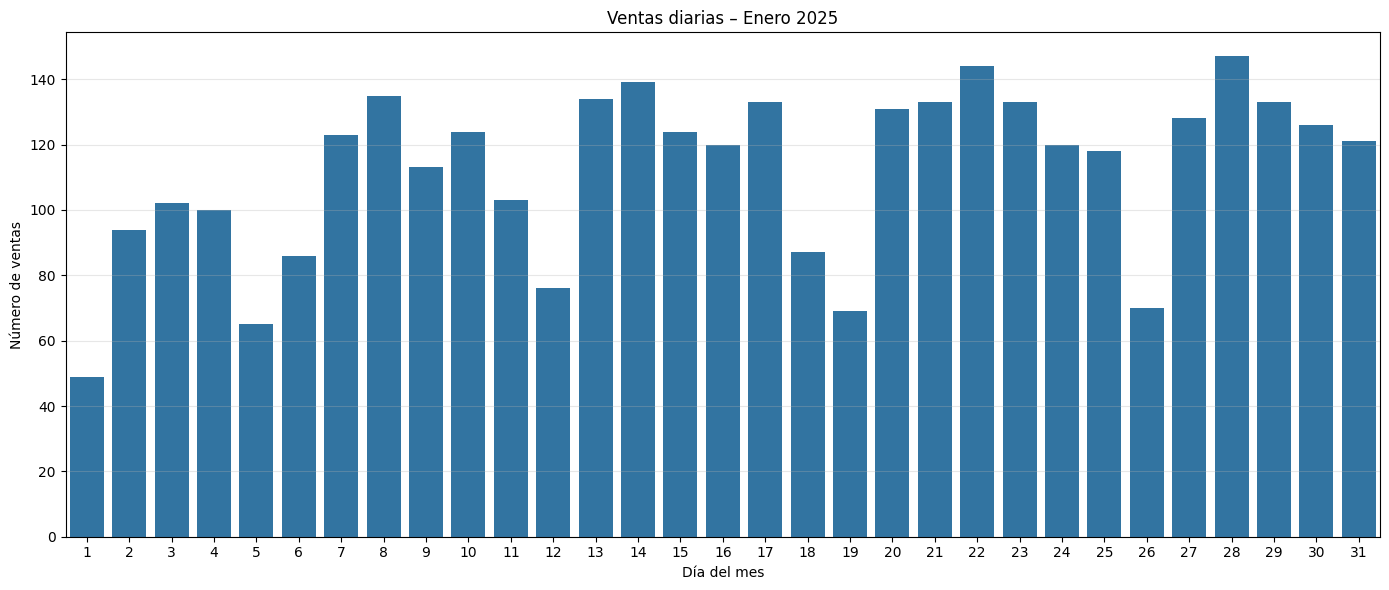

In [137]:
#grafico de ventas por fecha en enero
plt.figure(figsize=(14, 6))

sns.barplot(
    data=ventas_enero_2025,
    x='dia',
    y='total_ventas'
)

plt.title('Ventas diarias – Enero 2025')
plt.xlabel('Día del mes')
plt.ylabel('Número de ventas')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



In [ ]:
año_2026 = pd.read_excel("315588688_Reporte de Ventas - OMNI_030226095052067 (1).xlsx")

año_2026

,Folio,Canal,Tienda,Tipo de Entrega,Fulfillment,Referencia,Factura,Folio Fiscal,Fecha de creación,Estado,...,Comprador,Teléfono,Método de envío,Número de seguimiento,Calle Destino,Ciudad Destino,Estado Destino,CP Destino,Fecha de envío,Fecha de entrega
0,M2600021,MERCADO LIBRE,DISTRIBUCIONESDELAT,ENVIO,Sí,2000014533017674,NaN,NaN,2026-01-01 09:08:00,ENTREGADO,...,Jair Alejandro Delgado Ramirez,XXXXXXX,MEL Distribution,9fef9e25-51d6-5814-8ff9-088582c60c1b,Calle Garambullo,León,Guanajuato,37448.0,2026-01-01 23:52:00,NaN
1,M2600023,MERCADO LIBRE,DELATSASADECV,ENVIO,No,2000010827605079,NaN,NaN,2026-01-01 10:08:00,ENTREGADO,...,Juan Ramon Leyva Larrañaga,XXXXXXX,MEL Distribution,2bf20657-041b-5a1f-a042-161f0ef33c05,callejon Mercurio,Mazatlán,Sinaloa,82170.0,2026-01-03 12:22:00,NaN
2,M2600025,MERCADO LIBRE,DELATSASADECV,ENVIO,Sí,2000010828085041,NaN,NaN,2026-01-01 11:09:00,ENTREGADO,...,Mariela,XXXXXXX,MEL Distribution,a8c7a824-1953-566c-864b-76f137471e0c,colonia avante calle escárcega lote 5 manzana 7,Cancún/Benito Juárez,Quintana Roo,77536.0,2026-01-02 17:22:00,NaN
3,M2600026,MERCADO LIBRE,DELATSASADECV,ENVIO,No,2000010828379185,NaN,NaN,2026-01-01 11:45:00,CANCELADO,...,Kelly Joana Silva,XXXXXXX,MEL Distribution,eb432724-1967-5f83-9187-f744fae87aee,Calle Miguel Negrete,Nicolás Romero,Estado De México,54457.0,2026-01-03 12:22:00,NaN
4,M2600027,MERCADO LIBRE,DELATSASADECV,ENVIO,No,2000010828515653,NaN,NaN,2026-01-01 12:02:00,ENTREGADO,...,jesus perez,XXXXXXX,MEL Distribution,d299af5c-6965-5db9-9f15-5140887299d6,Lázaro Cárdenas,Jocotepec,Jalisco,45800.0,2026-01-03 12:22:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,M2603563,MERCADO LIBRE,DELATSASADECV,ENVIO,Información no disponible por el momento,2000011020033865,NaN,NaN,2026-01-13 10:24:00,CANCELADO,...,J. Angel Flores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3419,M2603572,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,Información no disponible por el momento,2000011020638277,NaN,NaN,2026-01-13 10:58:00,CANCELADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3420,M2603584,MERCADO LIBRE,DISTRIBUCIONESDELAT,ENVIO,Información no disponible por el momento,2000011022367077,NaN,NaN,2026-01-13 12:39:00,CANCELADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3421,M2603637,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,Información no disponible por el momento,2000011028720197,NaN,NaN,2026-01-13 18:42:00,CANCELADO,...,Héroe Vazquez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
año_2026.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3423 entries, 0 to 3422
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Folio                    3423 non-null   object 
 1   Canal                    3423 non-null   object 
 2   Tienda                   3423 non-null   object 
 3   Tipo de Entrega          3423 non-null   object 
 4   Fulfillment              3423 non-null   object 
 5   Referencia               3423 non-null   int64  
 6   Factura                  218 non-null    float64
 7   Folio Fiscal             218 non-null    object 
 8   Fecha de creación        3423 non-null   object 
 9   Estado                   3423 non-null   object 
 10  Fecha de actualización   3423 non-null   object 
 11  Almacén                  0 non-null      float64
 12  SKU                      3423 non-null   object 
 13  Título                   3423 non-null   object 
 14  Cantidad                

In [ ]:
año_2026.columns

Index(['Folio', 'Canal', 'Tienda', 'Tipo de Entrega', 'Fulfillment',
       'Referencia', 'Factura', 'Folio Fiscal', 'Fecha de creación', 'Estado',
       'Fecha de actualización', 'Almacén', 'SKU', 'Título', 'Cantidad',
       'Precio unitario', 'Total del producto', 'Total de la orden',
       'Comisión de Marketplace', 'Costo envío', 'Comprador', 'Teléfono',
       'Método de envío', 'Número de seguimiento', 'Calle Destino',
       'Ciudad Destino', 'Estado Destino', 'CP Destino', 'Fecha de envío',
       'Fecha de entrega'],
      dtype='object')

In [ ]:
#cambio de nombre de columnas
def limpiar_columnas(cols):
    nuevas = []
    for c in cols:
        c = str(c)
        c = c.lower()
        c = unicodedata.normalize('NFKD', c).encode('ascii', 'ignore').decode('utf-8')
        c = re.sub(r'[%]', 'porcentaje', c)
        c = re.sub(r'[^\w]+', '_', c)
        c = re.sub(r'_+', '_', c)
        c = c.strip('_')
        nuevas.append(c)
    return nuevas

año_2026.columns = limpiar_columnas(año_2026.columns)

año_2026


,folio,canal,tienda,tipo_de_entrega,fulfillment,referencia,factura,folio_fiscal,fecha_de_creacion,estado,...,comprador,telefono,metodo_de_envio,numero_de_seguimiento,calle_destino,ciudad_destino,estado_destino,cp_destino,fecha_de_envio,fecha_de_entrega
0,M2600021,MERCADO LIBRE,DISTRIBUCIONESDELAT,ENVIO,Sí,2000014533017674,NaN,NaN,2026-01-01 09:08:00,ENTREGADO,...,Jair Alejandro Delgado Ramirez,XXXXXXX,MEL Distribution,9fef9e25-51d6-5814-8ff9-088582c60c1b,Calle Garambullo,León,Guanajuato,37448.0,2026-01-01 23:52:00,NaN
1,M2600023,MERCADO LIBRE,DELATSASADECV,ENVIO,No,2000010827605079,NaN,NaN,2026-01-01 10:08:00,ENTREGADO,...,Juan Ramon Leyva Larrañaga,XXXXXXX,MEL Distribution,2bf20657-041b-5a1f-a042-161f0ef33c05,callejon Mercurio,Mazatlán,Sinaloa,82170.0,2026-01-03 12:22:00,NaN
2,M2600025,MERCADO LIBRE,DELATSASADECV,ENVIO,Sí,2000010828085041,NaN,NaN,2026-01-01 11:09:00,ENTREGADO,...,Mariela,XXXXXXX,MEL Distribution,a8c7a824-1953-566c-864b-76f137471e0c,colonia avante calle escárcega lote 5 manzana 7,Cancún/Benito Juárez,Quintana Roo,77536.0,2026-01-02 17:22:00,NaN
3,M2600026,MERCADO LIBRE,DELATSASADECV,ENVIO,No,2000010828379185,NaN,NaN,2026-01-01 11:45:00,CANCELADO,...,Kelly Joana Silva,XXXXXXX,MEL Distribution,eb432724-1967-5f83-9187-f744fae87aee,Calle Miguel Negrete,Nicolás Romero,Estado De México,54457.0,2026-01-03 12:22:00,NaN
4,M2600027,MERCADO LIBRE,DELATSASADECV,ENVIO,No,2000010828515653,NaN,NaN,2026-01-01 12:02:00,ENTREGADO,...,jesus perez,XXXXXXX,MEL Distribution,d299af5c-6965-5db9-9f15-5140887299d6,Lázaro Cárdenas,Jocotepec,Jalisco,45800.0,2026-01-03 12:22:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,M2603563,MERCADO LIBRE,DELATSASADECV,ENVIO,Información no disponible por el momento,2000011020033865,NaN,NaN,2026-01-13 10:24:00,CANCELADO,...,J. Angel Flores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3419,M2603572,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,Información no disponible por el momento,2000011020638277,NaN,NaN,2026-01-13 10:58:00,CANCELADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3420,M2603584,MERCADO LIBRE,DISTRIBUCIONESDELAT,ENVIO,Información no disponible por el momento,2000011022367077,NaN,NaN,2026-01-13 12:39:00,CANCELADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3421,M2603637,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,Información no disponible por el momento,2000011028720197,NaN,NaN,2026-01-13 18:42:00,CANCELADO,...,Héroe Vazquez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#cambiar a datetime la columna fecha_de_actualizacion
año_2026['fecha_de_actualizacion'] = pd.to_datetime(año_2026['fecha_de_actualizacion'], errors='coerce')
año_2026.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3423 entries, 0 to 3422
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   folio                    3423 non-null   object        
 1   canal                    3423 non-null   object        
 2   tienda                   3423 non-null   object        
 3   tipo_de_entrega          3423 non-null   object        
 4   fulfillment              3423 non-null   object        
 5   referencia               3423 non-null   int64         
 6   factura                  218 non-null    float64       
 7   folio_fiscal             218 non-null    object        
 8   fecha_de_creacion        3423 non-null   object        
 9   estado                   3423 non-null   object        
 10  fecha_de_actualizacion   3423 non-null   datetime64[ns]
 11  almacen                  0 non-null      float64       
 12  sku                      3423 non-

In [ ]:
#cambiar a datetime la columna fecha_de_creacion
año_2026['fecha_de_creacion'] = pd.to_datetime(año_2026['fecha_de_creacion'], errors='coerce')
año_2026.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3423 entries, 0 to 3422
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   folio                    3423 non-null   object        
 1   canal                    3423 non-null   object        
 2   tienda                   3423 non-null   object        
 3   tipo_de_entrega          3423 non-null   object        
 4   fulfillment              3423 non-null   object        
 5   referencia               3423 non-null   int64         
 6   factura                  218 non-null    float64       
 7   folio_fiscal             218 non-null    object        
 8   fecha_de_creacion        3423 non-null   datetime64[ns]
 9   estado                   3423 non-null   object        
 10  fecha_de_actualizacion   3423 non-null   datetime64[ns]
 11  almacen                  0 non-null      float64       
 12  sku                      3423 non-

In [ ]:
#ventas enero 2026
año_2026['fecha_de_creacion'] = pd.to_datetime(año_2026['fecha_de_creacion'], errors='coerce')
enero_2026 = año_2026[año_2026['fecha_de_creacion'].dt.month == 1]
enero_2026

,folio,canal,tienda,tipo_de_entrega,fulfillment,referencia,factura,folio_fiscal,fecha_de_creacion,estado,...,comprador,telefono,metodo_de_envio,numero_de_seguimiento,calle_destino,ciudad_destino,estado_destino,cp_destino,fecha_de_envio,fecha_de_entrega
0,M2600021,MERCADO LIBRE,DISTRIBUCIONESDELAT,ENVIO,Sí,2000014533017674,NaN,NaN,2026-01-01 09:08:00,ENTREGADO,...,Jair Alejandro Delgado Ramirez,XXXXXXX,MEL Distribution,9fef9e25-51d6-5814-8ff9-088582c60c1b,Calle Garambullo,León,Guanajuato,37448.0,2026-01-01 23:52:00,NaN
1,M2600023,MERCADO LIBRE,DELATSASADECV,ENVIO,No,2000010827605079,NaN,NaN,2026-01-01 10:08:00,ENTREGADO,...,Juan Ramon Leyva Larrañaga,XXXXXXX,MEL Distribution,2bf20657-041b-5a1f-a042-161f0ef33c05,callejon Mercurio,Mazatlán,Sinaloa,82170.0,2026-01-03 12:22:00,NaN
2,M2600025,MERCADO LIBRE,DELATSASADECV,ENVIO,Sí,2000010828085041,NaN,NaN,2026-01-01 11:09:00,ENTREGADO,...,Mariela,XXXXXXX,MEL Distribution,a8c7a824-1953-566c-864b-76f137471e0c,colonia avante calle escárcega lote 5 manzana 7,Cancún/Benito Juárez,Quintana Roo,77536.0,2026-01-02 17:22:00,NaN
3,M2600026,MERCADO LIBRE,DELATSASADECV,ENVIO,No,2000010828379185,NaN,NaN,2026-01-01 11:45:00,CANCELADO,...,Kelly Joana Silva,XXXXXXX,MEL Distribution,eb432724-1967-5f83-9187-f744fae87aee,Calle Miguel Negrete,Nicolás Romero,Estado De México,54457.0,2026-01-03 12:22:00,NaN
4,M2600027,MERCADO LIBRE,DELATSASADECV,ENVIO,No,2000010828515653,NaN,NaN,2026-01-01 12:02:00,ENTREGADO,...,jesus perez,XXXXXXX,MEL Distribution,d299af5c-6965-5db9-9f15-5140887299d6,Lázaro Cárdenas,Jocotepec,Jalisco,45800.0,2026-01-03 12:22:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,M2603563,MERCADO LIBRE,DELATSASADECV,ENVIO,Información no disponible por el momento,2000011020033865,NaN,NaN,2026-01-13 10:24:00,CANCELADO,...,J. Angel Flores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3419,M2603572,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,Información no disponible por el momento,2000011020638277,NaN,NaN,2026-01-13 10:58:00,CANCELADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3420,M2603584,MERCADO LIBRE,DISTRIBUCIONESDELAT,ENVIO,Información no disponible por el momento,2000011022367077,NaN,NaN,2026-01-13 12:39:00,CANCELADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3421,M2603637,MERCADO LIBRE,GR8 DISTRIBUCIONESDELAT,ENVIO,Información no disponible por el momento,2000011028720197,NaN,NaN,2026-01-13 18:42:00,CANCELADO,...,Héroe Vazquez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ventas_enero_2026= (
    enero_2026
    .groupby(enero_2026['fecha_de_creacion'].dt.date)
    .size()
    .reset_index(name='total_ventas')
)

ventas_enero_2026

,fecha_de_creacion,total_ventas
0,2026-01-01,35
1,2026-01-02,101
2,2026-01-03,104
3,2026-01-04,75
4,2026-01-05,125
5,2026-01-06,102
6,2026-01-07,149
7,2026-01-08,114
8,2026-01-09,109
9,2026-01-10,89


In [138]:
ventas_enero_2026['dia'] = ventas_enero_2026['fecha_de_creacion'].apply(lambda x: x.day)
ventas_enero_2026

,fecha_de_creacion,total_ventas,dia
0,2026-01-01,35,1
1,2026-01-02,101,2
2,2026-01-03,104,3
3,2026-01-04,75,4
4,2026-01-05,125,5
5,2026-01-06,102,6
6,2026-01-07,149,7
7,2026-01-08,114,8
8,2026-01-09,109,9
9,2026-01-10,89,10


In [ ]:
#grafica de ventas_enero_2026
plt.figure(figsize=(14, 6))

sns.barplot(
    data=ventas_enero_2026
    x='dia',
    y='total_ventas'
)

plt.title('Ventas diarias – Enero 2026)
plt.xlabel('Día del mes')
plt.ylabel('Número de ventas')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


SyntaxError: unterminated string literal (detected at line 10) (1307887777.py, line 10)

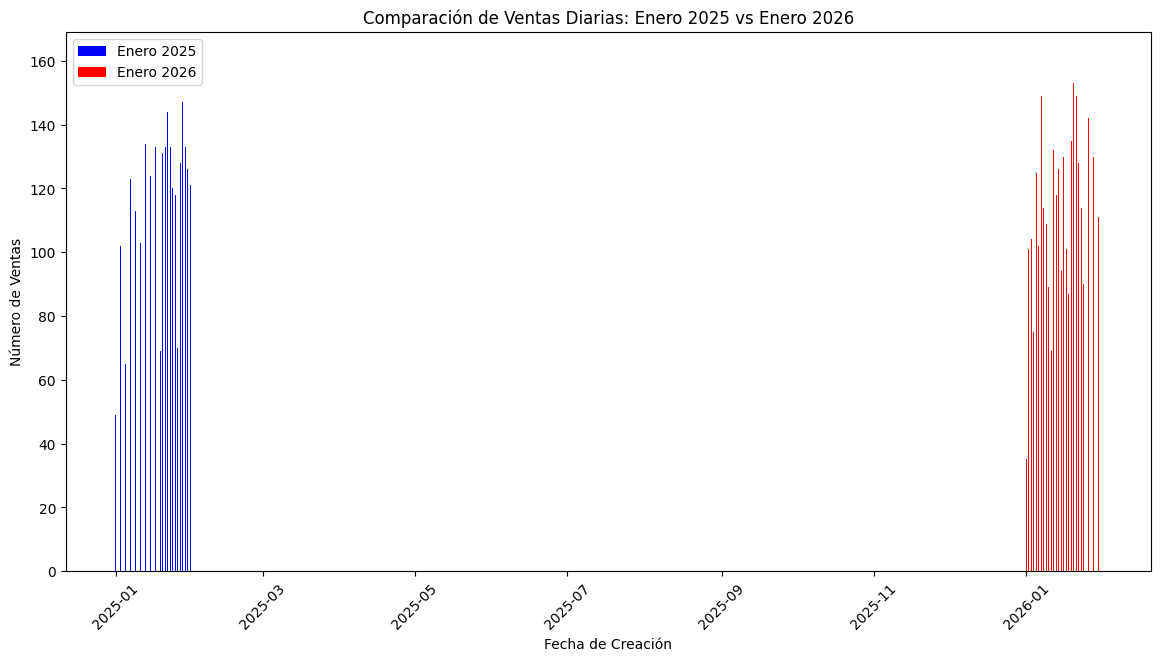

In [ ]:
#comparacion grafica de barrars ventas enero 2025 vs enero 2026 
plt.figure(figsize=(14, 7))
width = 0.35
plt.bar(ventas_enero_2025['fecha_de_creacion'], ventas_enero_2025['total_ventas'], width=width, label='Enero 2025', color='b', align='center')
plt.bar(ventas_enero_2026['fecha_de_creacion'] + pd.Timedelta(days=width), ventas_enero_2026['total_ventas'], width=width, label='Enero 2026', color='r', align='center')
plt.title('Comparación de Ventas Diarias: Enero 2025 vs Enero 2026')
plt.xlabel('Fecha de Creación') 
plt.ylabel('Número de Ventas')
plt.xticks(rotation=45)
plt.legend()
plt.show()